<a href="https://colab.research.google.com/github/udg2019/oss/blob/master/4_1_Quiz_GIS_Tutorials_with_OSMNX_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로그램 설치

프로그램을 설치한뒤에, restart runtime을 실행한뒤에 2번째셀부터 이후 실행을 진행하시면 됩니다.

#📍 GIS 튜토리얼: OSMnx를 활용한 공간정보 분석 퀴즈

이 노트북은 OSMnx 라이브러리를 활용하여 공간정보 기반의 퀴즈를 만들고 학습하는 실습 예제를 담고 있습니다.
OSMnx는 OpenStreetMap 데이터를 이용해 다음과 같은 기능을 손쉽게 수행할 수 있도록 돕는 파이썬 라이브러리입니다:

 - 도로망, 건물, 지형 등의 공간데이터 수집
 - 네트워크 기반의 경로 탐색
 - 지도 시각화 및 분석

🧭 주요 학습 목표
 - OSMnx 설치 및 기본 사용법 숙지
 - 특정 지역의 도로망과 건물 데이터 불러오기
 - 공간 데이터를 활용한 퀴즈 형식의 실습 수행

## ✅ 사전 준비: 라이브러리 설치

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

%matplotlib inline
# ox.config(log_console=True)
ox.__version__

'2.0.2'

예제 1: 부산시 해운대구의 도로망 시각화

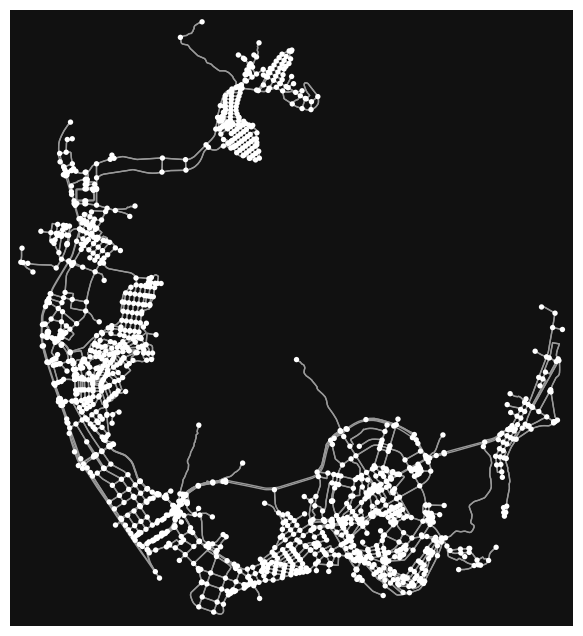

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
place_name = "Haeundae-gu, Busan, South Korea"
graph = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(ox.project_graph(graph))

# 도로 네트워크 작업해 보기

1. graph_from_place: 지역명
1. graph_from_address: 주소정보
1. graph_from_point: 위경도정보
1. graph_from_bbox: 동서남북좌표

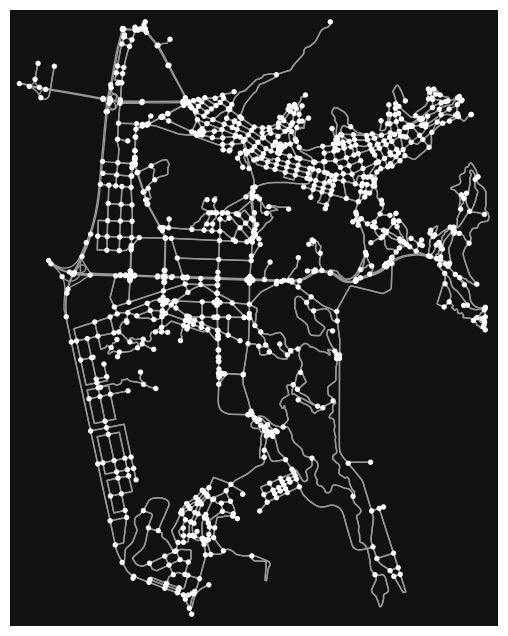

In [ ]:
# download/model a street network for some city then visualize it
place = "Saha-gu, Busan, Korea"
G = ox.graph_from_place(place, network_type="drive")
fig, ax = ox.plot_graph(G)

### *quiz1: 주소로부터 지도를 출력하시기 바랍니다


In [ ]:
address = "" #@param {type:"string"}

# 도로의 속성 값에 따라서 다른 형태의 도로로 표시하기

아래 링크에서 다양한 도로정보를 살펴볼수가 있다.
https://wiki.openstreetmap.org/wiki/Key:highway


Folium은 Leaflet.js를 기반으로 만들어진 파이썬 라이브러리로,
지리 공간 데이터를 시각적으로 표현하고, 웹 브라우저에서 인터랙티브한 지도를 생성할 수 있습니다.

 - 지도에 포인트나 핀 추가 가능
 - 경로 및 영역 그리기
 - 복잡한 공간 데이터 시각화
 - OpenStreetMap, Stamen, CartoDB 등 다양한 지도 스타일

In [ ]:
import folium

In [ ]:
# 각 도로 유형별 색상 정의
hwy_colors = {
    'motorway': 'red',
    'primary': 'orange',
    'secondary': 'yellow',
    'tertiary': 'green',
    'residential': 'blue'
}

In [ ]:
# 중심 좌표 계산
_, edges = ox.graph_to_gdfs(G)
center_latlng = edges.unary_union.centroid.coords[0][::-1]

<ipython-input-8-a062d11b8a18>:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center_latlng = edges.unary_union.centroid.coords[0][::-1]


In [ ]:
# folium 지도 생성
m = folium.Map(location=center_latlng, zoom_start=13)

In [ ]:
# 엣지별 도로 추가
for u, v, data in G.edges(data=True):
    if 'geometry' in data:
        coords = list(data['geometry'].coords)
    else:
        coords = [(G.nodes[u]['y'], G.nodes[u]['x']),
                  (G.nodes[v]['y'], G.nodes[v]['x'])]

    # 도로 타입 추출
    hwy_type = data.get('highway', None)
    if isinstance(hwy_type, list):
        hwy_type = hwy_type[0]

    color = hwy_colors.get(hwy_type, 'black')

    # 지도에 선 추가
    folium.PolyLine(coords, color=color, weight=2, popup=str(hwy_type)).add_to(m)


In [ ]:
m

### *quiz2: 도보(walk)을 다른 색깔과 함께 추가해보시오.

# 기본적인 도로네트워크

 - 도로망 그래프의 공간적 범위(면적)를 계산하고
 - 기초 통계 정보를 얻으며
 - GIS 및 네트워크 도구와 연동하기 위한 파일로 저장하는 과정을 수행합니다

In [ ]:
# 네트워크 면적 계산
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

<ipython-input-12-80dce3f05c8c>:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  graph_area_m = nodes_proj.unary_union.convex_hull.area


38066189.91109442

In [ ]:
# 도로망 통계 출력
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 1076,
 'm': 2901,
 'k_avg': 5.392193308550186,
 'edge_length_total': 438807.6209935193,
 'edge_length_avg': 151.26081385505665,
 'streets_per_node_avg': 3.050185873605948,
 'streets_per_node_counts': {0: 0, 1: 101, 2: 3, 3: 723, 4: 239, 5: 10},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09386617100371747,
  2: 0.0027881040892193307,
  3: 0.6719330855018587,
  4: 0.22211895910780668,
  5: 0.00929368029739777},
 'intersection_count': 975,
 'street_length_total': 248197.70024215968,
 'street_segment_count': 1631,
 'street_length_avg': 152.17516875668895,
 'circuity_avg': 1.0945040995849071,
 'self_loop_proportion': 0.002452483139178418,
 'clean_intersection_count': 763,
 'node_density_km': 28.266553666470283,
 'intersection_density_km': 25.613280506327627,
 'edge_density_km': 11527.48993315006,
 'street_density_km': 6520.161351105493,
 'clean_intersection_density_km': 20.044033873156902}

In [ ]:
#  도로망 파일로 저장
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

# 도로의 중심성을 시각화

- OSMnx 그래프의 각 도로 구간(엣지) 에 대해
Closeness Centrality (접근 중심성) 을 계산합니다.
- 이를 시각화해서 네트워크에서 중요한 도로 구간을 강조합니다

In [ ]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

NameError: name 'nx' is not defined

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

ValueError: There are no attribute values.

## quiz3: 부산의 다른 지역(번화가 중심성)을 진행하길 바랍니다. 이때 node_centrality와 차이가 있는지 확인해 보세요

# 경로(Routing) 확인
도로망 그래프의 각 엣지(도로 구간) 에 대해:
 - 속도 (speed_kph) 를 추정하고
 - 해당 속도를 기반으로 이동 시간 (travel_time) 을 계산합니다

In [ ]:
# 기본 속도 매핑 (단위: kph)
default_speeds = {
    'motorway': 100,
    'trunk': 80,
    'primary': 60,
    'secondary': 50,
    'tertiary': 40,
    'residential': 30,
    'unclassified': 25
}

In [ ]:
# 1. 속도 채우기
for u, v, k, data in G.edges(keys=True, data=True):
    hwy = data.get('highway', None)
    if isinstance(hwy, list):
        hwy = hwy[0]
    speed = data.get('maxspeed', None)

    if speed is None:
        data['speed_kph'] = default_speeds.get(hwy, 30)  # 기본값: 30kph
    elif isinstance(speed, list):
        try:
            data['speed_kph'] = float(speed[0])
        except:
            data['speed_kph'] = default_speeds.get(hwy, 30)
    else:
        try:
            data['speed_kph'] = float(speed)
        except:
            data['speed_kph'] = default_speeds.get(hwy, 30)

In [ ]:
# 2. 이동 시간 계산
for u, v, k, data in G.edges(keys=True, data=True):
    length_m = data.get('length', 0)
    speed_mps = data['speed_kph'] * 1000 / 3600  # kph → m/s
    data['travel_time'] = length_m / speed_mps if speed_mps > 0 else None

In [ ]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=128.96755631796773, Y=35.11601594137444)
dest = ox.distance.nearest_nodes(G, X=128.96517223758627, Y=35.046698756214056)

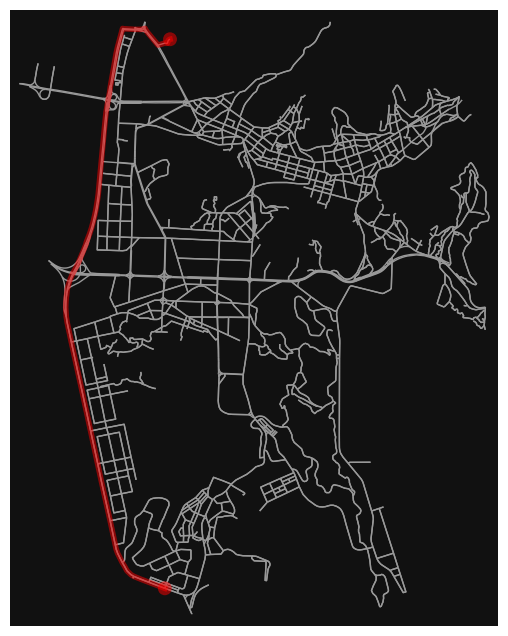

In [ ]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
routes  = ox.k_shortest_paths(G, orig, dest, 3, weight="travel_time")
paths = [r for r in routes]

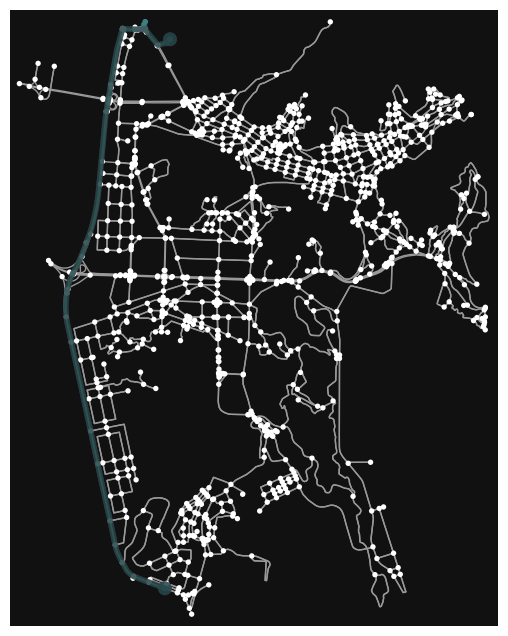

In [ ]:
# find the k-shortest paths between nodes, minimizing travel time, then plot it
fig, ax = ox.plot_graph_routes(G, paths, route_colors=['r','b','g'], route_linewidth=3)

In [ ]:
edge_lengths = []
for u, v in zip(route[:-1], route[1:]):
    data = min(G.get_edge_data(u, v).values(), key=lambda d: d.get("length", float("inf")))
    edge_lengths.append(data["length"])

total_length_m = round(sum(edge_lengths))
print(f"총 경로 거리: {total_length_m} meters")

총 경로 거리: 8704 meters


In [ ]:
from geopy.distance import great_circle

orig_coords = (G.nodes[orig]["y"], G.nodes[orig]["x"])
dest_coords = (G.nodes[dest]["y"], G.nodes[dest]["x"])

distance_m = round(great_circle(orig_coords, dest_coords).meters)
print(f"직선 거리: {distance_m} meters")

직선 거리: 7255 meters


### quiz5: networkx알고리즘 다양한 routing 알고리즘을 가지고 있습니다.
https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html
위 링크를 참고하여 다양한 routing 정보에 지도에 표현하길 바랍니다.

## 1. Fast nearest node/edge search with OSMnx

공간 좌표(x, y 혹은 경도, 위도)가 주어졌을 때
→ OSMnx 네트워크 그래프에서 가장 가까운 노드 또는 간선을 빠르게 찾는 기능


In [ ]:
Gp = ox.project_graph(G)

In [ ]:
# randomly sample n points spatially-constrained to the network's geometry
points = ox.utils_geo.sample_points(nx.MultiGraph(Gp), n=100)
X = points.x.values
Y = points.y.values
X0 = X.mean()
Y0 = Y.mean()

In [ ]:
# find each nearest node to several points, and optionally return distance
nodes, dists = ox.nearest_nodes(Gp, X, Y, return_dist=True)

In [ ]:
# or, find the nearest node to a single point
node = ox.nearest_nodes(Gp, X0, Y0)
node

1769205020

In [ ]:
# find each nearest edge to several points, and optionally return distance
edges, dists = ox.nearest_edges(Gp, X, Y, return_dist=True)

In [ ]:
# find the nearest edge to a single point
edge = ox.nearest_edges(Gp, X0, Y0)
edge

(1769205020, 1769204971, 0)

# 여정시간 계산 및 시각화

In [ ]:
!pip install descartes

In [ ]:
import geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

network_type: One of ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, or ‘all_private’.

In [ ]:
# configure the place, network type, trip times, and travel speed
address = "Hadan-dong, Saha-gu, Busan, Korea"
network_type = "walk"
trip_times = [5, 10, 15, 20, 25, 30]  # 분 단위의 여행시간, 5분거리내
travel_speed = 4.5  # 걷는 속도 (km/hour)

In [ ]:
# 위치에 따른 지도 가져오기
G = ox.graph_from_address( address, dist=1000, network_type=network_type)

In [ ]:
# 원하는 지점과 해당 지도에 대해서 그래프
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
# x, y = gdf_nodes["geometry"].unary_union.centroid.xy # 지도 중심점 좌표
# 동아대학교의 위경도 좌표: lat -> 위도 x , 경도->lon y
x = 128.96817249950897
y = 35.11755694483541
center_node = ox.distance.nearest_nodes(G, x, y)
G = ox.project_graph(G)

In [ ]:
# 계산을 위한 edges에 속성값을 넣습니다.
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

아래 코드는 OSMnx에서 컬러맵(cmap)을 이용하여 등시거리(isochrone) 시각화를 위한 색상 팔레트를 생성하는 예제입니다.

In [ ]:
from matplotlib import colors as mcolors
# get one color for each isochrone
rgba_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)
iso_colors = [mcolors.to_hex(c) for c in rgba_colors]

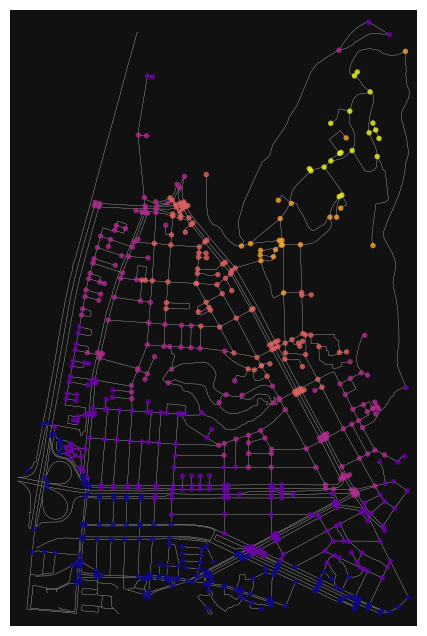

In [ ]:
# 등시성에 따라 노드에 색칠
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

In [ ]:
# 등시성의 polygon 구현
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

<ipython-input-78-bf8a9174a666>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
<ipython-input-78-bf8a9174a666>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
<ipython-input-78-bf8a9174a666>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
<ipython-input-78-bf8a9174a666>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
<ipython-input-78-bf8a9174a666>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bounding_poly = gpd.GeoSeries(node_points)

- shapely.geometry.Polygon 또는 MultiPolygon, 또는 GeoJSON 객체를
- Matplotlib의 PathPatch로 변환하여
- matplotlib.pyplot에서 등시거리, 행정경계 등 지도에 폴리곤을 그릴 수 있도록 지원

In [ ]:
"""
  CustomPolygonPath
"""

from matplotlib.patches import PathPatch
from matplotlib.path import Path
from numpy import asarray, concatenate, ones

def CustomPolygonPath(polygon):
    """Constructs a compound matplotlib path from a Shapely or GeoJSON-like
    geometric object"""

    def coding(ob):
        # The codes will be all "LINETO" commands, except for "MOVETO"s at the
        # beginning of each subpath
        n = len(getattr(ob, 'coords', None) or ob)
        vals = ones(n, dtype=Path.code_type) * Path.LINETO
        vals[0] = Path.MOVETO
        return vals

    if hasattr(polygon, 'geom_type'):  # Shapely
        ptype = polygon.geom_type
        if ptype == 'Polygon':
            polygon = [Polygon(polygon)]
        elif ptype == 'MultiPolygon':
            polygon = [Polygon(p) for p in polygon]
        else:
            raise ValueError(
                "A polygon or multi-polygon representation is required")

    else:  # GeoJSON
        polygon = getattr(polygon, '__geo_interface__', polygon)
        ptype = polygon["type"]
        if ptype == 'Polygon':
            polygon = [Polygon(polygon)]
        elif ptype == 'MultiPolygon':
            polygon = [Polygon(p) for p in polygon['coordinates']]
        else:
            raise ValueError(
                "A polygon or multi-polygon representation is required")

    # convert `t.exterior` into `t.exterior.coords`
    # contributed by https://github.com/jsk0910
    vertices = concatenate([
        concatenate([asarray(t.exterior.coords)[:, :2]] +
                    [asarray(r)[:, :2] for r in t.interiors])
        for t in polygon])
    codes = concatenate([
        concatenate([coding(t.exterior)] +
                    [coding(r) for r in t.interiors]) for t in polygon])

    return Path(vertices, codes)

def CustomPolygonPatch(polygon, **kwargs):
    # 변경된 내용
    # 새로운 동작을 수행하는 코드
    return PathPatch(CustomPolygonPath(polygon), **kwargs)

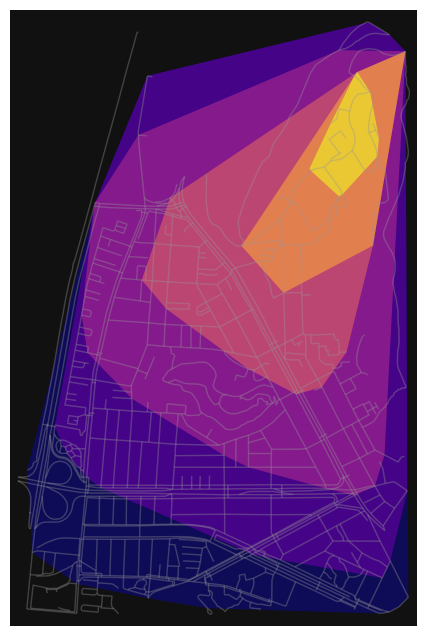

In [ ]:
# 등시성에 따른 네트워크를 표기
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = CustomPolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1 )
    # patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

주어진 도로망과 중심 노드를 기준으로, 특정 시간 안에 도달 가능한 영역을 다각형(Polygon) 형태로 만들어 시각화하거나 분석할 수 있게 합니다.

In [ ]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")

        node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({"id": list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index("id")

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get("geometry", LineString([f, t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union

        # try to fill in surrounded areas so shapes will appear solid and
        # blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

<ipython-input-81-47debb5354e1>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
<ipython-input-81-47debb5354e1>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
<ipython-input-81-47debb5354e1>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
<ipython-input-81-47debb5354e1>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
<ipython-input-81-47debb5354e1>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  new_iso = gpd.GeoSeries(all_gs).unary_union
<ipython-input-81-47debb5354e1>:20: DeprecationWarning: The 'unary_union' attribute i

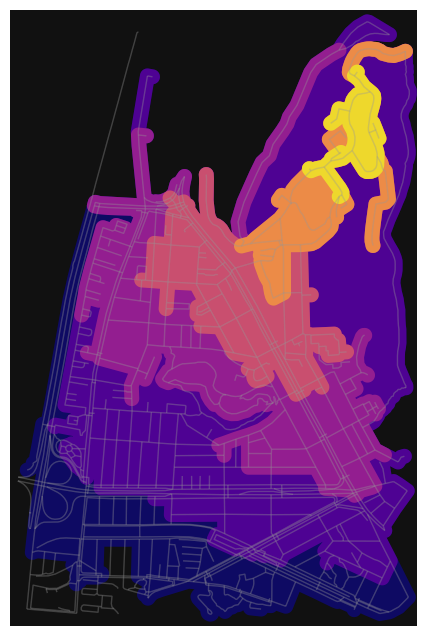

In [ ]:
isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = CustomPolygonPatch(polygon, fc=fc, ec="none", alpha=0.7, zorder=-1)
    ax.add_patch(patch)
plt.show()

# YOUR WORK: Hyperlocal 찾기
Definition: information oriented around a well-defined community with its primary focus directed toward the concerns of the population in that community.

슬세권이란 슬리퍼와 같은 편한 복장으로 각종 여가·편의시설을 이용할 수 있는 주거 권역을 가리킨다. 일상생활에 필요한 대부분을 인근에서 해결할 수 있어 주거 편의성이 높은 만큼 젊은 세대가 주 수요층인 오피스텔 시장에서 선호도가 높게 나타나고 있다.

출처 : 국토일보(http://www.ikld.kr)

주요 속성: 도보거리
A comparison of gait biomechanics of flip-flops,
sandals, barefoot and shoes
https://jfootankleres.biomedcentral.com/track/pdf/10.1186/1757-1146-6-45.pdf

# 공공데이터 참여하기: 지리적 정보(위경도, 주소)가 있는 공공데이터를 관련 정보를 여기 위에 반영하는 방법